LSTM（长短期记忆）是一种循环神经网络（RNN）的变体，主要用于处理序列数据。相比于传统的RNN，LSTM能够更好地处理长序列和梯度消失的问题。

LSTM的核心思想是引入了“门”的概念，即输入门、遗忘门和输出门。输入门控制着新输入的加入，遗忘门控制着过去的信息是否需要被遗忘，输出门控制着输出的信息。这些门的开关状态由网络学习得到，并能够根据当前输入和过去的状态来动态地调整。

通过引入“门”的概念，LSTM能够更好地控制信息流的传递和遗忘，从而更好地处理长序列数据。

![](https://raw.githubusercontent.com/xuehangcang/DeepLearning/main/static/LSTM.PNG)

如何使用 Pytorch 实现 LSTM 进行线性预测。

## 1. 准备数据集

使用 sin 函数作为数据集，生成 20 个样本，每个样本有 10 个时间步长。代码如下：

In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

生成 sin 数据集

In [32]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

将数据集转为 Pytorch Tensor

In [33]:
x = torch.tensor(y[:-10, None], dtype=torch.float32)
y = torch.tensor(y[10:, None], dtype=torch.float32)

可视化数据集

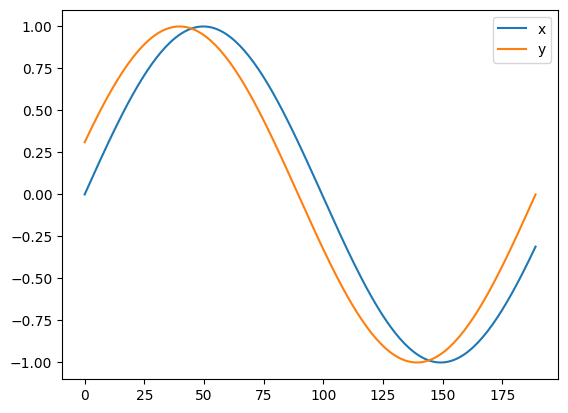

In [34]:
plt.plot(x.numpy(), label='x')
plt.plot(y.numpy(), label='y')
plt.legend()
plt.show()

## 2.定义 LSTM 模型
使用一个单层的 LSTM 模型，输入维度为 1，隐藏层维度为 10，输出维度为 1。代码如下：

In [35]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, input):
        h0 = torch.zeros(1, input.size(1), self.hidden_size)
        c0 = torch.zeros(1, input.size(1), self.hidden_size)
        output, _ = self.lstm(input, (h0, c0))
        output = self.linear(output[-1])
        return output

创建 LSTM 模型

In [36]:
model = LSTM(input_size=1, hidden_size=10, output_size=1)
print(model)

LSTM(
  (lstm): LSTM(1, 10)
  (linear): Linear(in_features=10, out_features=1, bias=True)
)


## 3. 训练模型

使用均方误差（MSE）作为损失函数，使用 Adam 优化器进行训练。代码如下：

In [37]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [38]:
for epoch in range(1000):
    # 前向传播
    y_pred = model(x.unsqueeze(1)) # x.unsqueeze(1) 将 x 的维度从 (190, ) 变为 (190, 1)
    # 计算损失
    loss = criterion(y_pred, y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 打印损失
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.7092781662940979
Epoch: 100, Loss: 0.5221606492996216
Epoch: 200, Loss: 0.5221602916717529
Epoch: 300, Loss: 0.5221602320671082
Epoch: 400, Loss: 0.5221602320671082
Epoch: 500, Loss: 0.5221602320671082
Epoch: 600, Loss: 0.5221602320671082
Epoch: 700, Loss: 0.5221602320671082
Epoch: 800, Loss: 0.5221602320671082
Epoch: 900, Loss: 0.5221602320671082


可视化预测结果

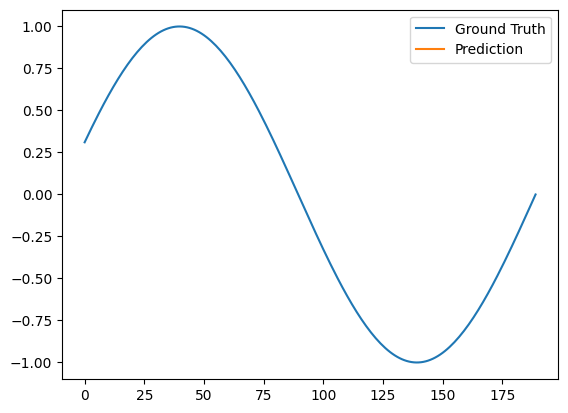

In [39]:
with torch.no_grad():
    y_pred = model(x.unsqueeze(1)) #
    plt.plot(y.numpy(), label='Ground Truth')
    plt.plot(y_pred.numpy(), label='Prediction')
    plt.legend()
    plt.show()